In [1]:
import pandas as pd

In [2]:
# Load CSV into DataFrame
df = pd.read_csv("sales_data_7.csv")

In [3]:
print(df.head())

   order_id     product  quantity  price  order_date
0         1  Headphones         2   3814  26-01-2025
1         2  Headphones         2   4793  15-04-2025
2         3  Headphones         1   6124  25-03-2025
3         4       Phone         4  18943  20-02-2025
4         5  Headphones         4   4572  12-04-2025


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Step 1: Connect to SQLite database (creates if not exists)
conn = sqlite3.connect("sales_data_7.db")
cursor = conn.cursor()

In [6]:
# Step 2: Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    order_id INTEGER,
    product TEXT,
    quantity INTEGER,
    price REAL,
    order_date TEXT
)
""")

In [8]:
# Step 3: Import data from CSV into SQLite
df = pd.read_csv("sales_data_7.csv")
df.to_sql("sales", conn, if_exists="replace", index=False)


100

In [9]:
# Step 4: Run SQL Query (Basic Sales Summary)
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
result_df = pd.read_sql_query(query, conn)

In [10]:
# Step 5: Display Results
print("=== Sales Summary ===")
print(result_df)

=== Sales Summary ===
      product  total_qty  revenue
0  Headphones         76   342545
1      Laptop         43  2131851
2       Phone         84  1705163
3  Smartwatch         65   636345
4      Tablet         51   749663


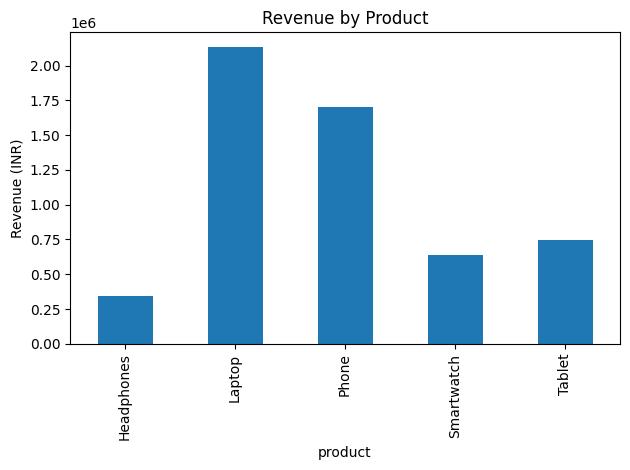

In [13]:
# Step 6: Plot Bar Chart
result_df.plot(kind="bar", x="product", y="revenue", legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue (INR)")
plt.tight_layout()
plt.savefig("sales_chart.png")  # saves chart in working directory
plt.show()

In [14]:
# Close connection
conn.close()